In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
from collections import defaultdict

In [3]:
postings_data = pd.read_csv('../data/Lightcast, UK Postings Sample.csv', low_memory=False)
complete_df = postings_data[postings_data['JOB_DESCRIPTION'].notnull()]

In [154]:
complete_df

,,POSTED,TITLE_NAME,SOC_4,SOC_4_NAME,SOC_3,SOC_3_NAME,SOC_2,SOC_2_NAME,LOT_OCCUPATION_NAME,...,INDUSTRY,IS_INTERNSHIP,IS_REMOTE,SPECIALIZED_SKILLS_NAME,COMMON_SKILLS_NAME,SOFTWARE_SKILLS_NAME,CERTIFICATIONS_NAME,EDULEVELS_NAME_MIN,SALARY,JOB_DESCRIPTION
0,820881164.0,14/08/2021,Quality Control Laboratory Supervisors,2111.0,Chemical scientists,211.0,Natural and Social Science Professionals,21.0,"Science, Research, Engineering and Technology ...",NaN,...,Scientific research and development,False,False,"[\n ""High-Performance Liquid Chromatography"",...","[\n ""Management""\n]",[],[],Bachelor's or equivalent,NaN,HPLC Laboratory Supervisor\n\nPosted by Adzuna...
1,820921812.0,14/08/2021,Education and Government Financial Engagement ...,4159.0,Other administrative occupations n.e.c.,415.0,Other Administrative Occupations,41.0,Administrative Occupations,Office / Administrative Assistant,...,Information service activities,False,False,"[\n ""Target Audience"",\n ""Procurement"",\n ""...","[\n ""Ability To Meet Deadlines"",\n ""Influenc...",[],[],NaN,NaN,Government Engagement Manager\nChiswick\n\nGre...
2,820917873.0,14/08/2021,Permanency Specialists,3513.0,Ship and hovercraft officers,351.0,Transport Associate Professionals,35.0,Business and Public Service Associate Professi...,Ship / Boat Captain,...,Air transport,False,False,"[\n ""Basic Safety Training""\n]","[\n ""Management"",\n ""Consulting""\n]",[],"[\n ""Standards Of Training Certification and ...",NaN,NaN,Master (Tug) - UK - Permanent\n\nPosted today ...
3,820965527.0,15/08/2021,Technical Services Administrators,5223.0,Metal working production and maintenance fitters,522.0,"Metal Machining, Fitting and Instrument Making...",52.0,"Skilled Metal, Electrical and Electronic Trades",Repair / Service Technician,...,Food and beverage service activities,False,False,"[\n ""IBM Maximo"",\n ""Statistical Analysis"",\...","[\n ""Customer Service"",\n ""Confident Communi...","[\n ""IBM Maximo""\n]",[],NaN,22500.0,Estates & Technical Services Administrator\n\n...
4,820991372.0,15/08/2021,Deputy Team Leaders,4123.0,Bank and post office clerks,412.0,Administrative Occupations: Finance,41.0,Administrative Occupations,Project Manager,...,"Financial service activities, except insurance...",False,False,"[\n ""Health Assessment"",\n ""Auditing""\n]","[\n ""Communications"",\n ""Management"",\n ""Mi...","[\n ""Microsoft Excel""\n]",[],NaN,37988.0,Independent Audit Deputy Team Leader - (DAC)\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100006,742791641.0,17/01/2018,Production Operatives,3119.0,"Science, engineering and production technician...",311.0,"Science, Engineering and Production Technicians",31.0,"Science, Engineering and Technology Associate ...",Production Worker,...,"Financial service activities, except insurance...",False,False,"[\n ""Development Environment"",\n ""Laboratory...","[\n ""Communications"",\n ""Management"",\n ""De...",[],[],NaN,NaN,Skilled Production Operative\n\nSt. austell (F...
100007,742783084.0,17/01/2018,Account Managers,2421.0,Chartered and certified accountants,242.0,"Business, Research and Administrative Professi...",24.0,"Business, Media and Public Service Professionals",Accountant,...,NaN,False,False,[],[],[],"[\n ""Association Of Chartered Certified Accou...",Bachelor's or equivalent,NaN,Job Overview\n-Accounts Manager ACA / ACCA
100008,742721758.0,17/01/2018,Mechanical Fitters,2122.0,Mechanical engineers,212.0,Engineering Professionals,21.0,"Science, Research, Engineering and Technology ...",Mechanical Engineer,...,Employment activities,False,False,"[\n ""Hand Tools"",\n ""Technical Recruitment"",...",[],[],[],NaN,22048.0,Mechanical Fitter\n\nRecruiter\n BMR Soluti...
100009,742716249.0,17/01/2018,Support Workers,6145.0,Care workers and home carers,614.0,Caring Personal Services,61.0,Caring Personal Service Occupations,Caregiver / Personal Care Aide,...,Residential care activities,False,False,"[\n ""Mental Healt

(-1.1059856344674828,
 1.127298932569311,
 -1.1020719338440208,
 1.1000986635163819)

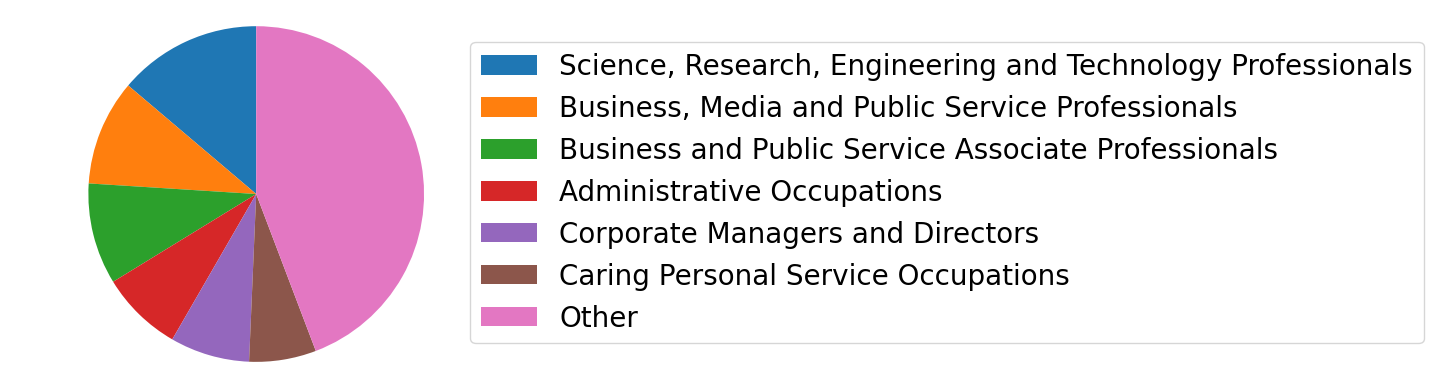

In [141]:
nicecounts = dict(complete_df['SOC_2_NAME'].value_counts()[0:6])
nicecounts['Other'] = 41490
labels = []
sizes = []
for x, y in nicecounts.items():
    labels.append(x)
    sizes.append(y)

# colors = ['red', 'blue', 'green', 'yellow']

patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, bbox_to_anchor=(0.9, 0.95),prop={'size': 20})
plt.axis('equal')

In [140]:
complete_df['SOC_2_NAME'].value_counts()[7:-1].sum()

41490

In [4]:
kws_list_sb = ['climate','climate-change','global warming','renewable','renewables','green energy','circular','zero waste',
               'net zero','sustainable','sustainability','low carbon','low-carbon','carbon-neutral','reduce carbon', 'carbon reduction',
               'carbon footprint','zero carbon','esg','green tech','green transition','sfdr','eu taxonomy','green bonds', 'carbon free',
               'carbon-free','sdg','biodiversity','eco-friendly', 'environmentally friendly','green economy','energy policy',
               'circular economy', 'green job']

green_inds_array = [complete_df[complete_df['JOB_DESCRIPTION'].str.contains(i)].index.values
 for i in kws_list_sb]

green_inds = [i for j in green_inds_array for i in j]

# Remove duplicates
green_inds = list(dict.fromkeys(green_inds))

In [5]:
green_df = complete_df.loc[green_inds]
green_df

,,POSTED,TITLE_NAME,SOC_4,SOC_4_NAME,SOC_3,SOC_3_NAME,SOC_2,SOC_2_NAME,LOT_OCCUPATION_NAME,...,INDUSTRY,IS_INTERNSHIP,IS_REMOTE,SPECIALIZED_SKILLS_NAME,COMMON_SKILLS_NAME,SOFTWARE_SKILLS_NAME,CERTIFICATIONS_NAME,EDULEVELS_NAME_MIN,SALARY,JOB_DESCRIPTION
85,821523163.0,20/08/2021,Empowerment Coaches,2134.0,IT project and programme managers,213.0,Information Technology and Telecommunications ...,21.0,"Science, Research, Engineering and Technology ...",IT Project Manager,...,Legal and accounting activities,False,False,"[\n ""Agile Methodology"",\n ""Branding"",\n ""E...","[\n ""Communications"",\n ""Research"",\n ""Rela...","[\n ""Microsoft PowerPoint"",\n ""Microsoft Exc...",[],NaN,NaN,"Assistant Manager, WorldClimate Empowerment, O..."
632,768024615.0,13/03/2019,Unclassified,7111.0,Sales and retail assistants,711.0,Sales Assistants and Retail Cashiers,71.0,Sales Occupations,Retail Sales Associate,...,Employment activities,False,False,"[\n ""Aerial Work Platforms"",\n ""Construction...","[\n ""Management"",\n ""Communications""\n]",[],[],NaN,NaN,Title Scissor Lift IPAF Op's with CCDO Sala...
717,806637789.0,23/02/2021,Fashion Merchandising Interns,7130.0,Sales supervisors,713.0,Sales Supervisors,71.0,Sales Occupations,Retail Store Manager / Supervisor,...,Employment activities,False,False,"[\n ""Merchandising"",\n ""Supplier Relationshi...","[\n ""Forecasting"",\n ""Management"",\n ""Budge...",[],[],NaN,95000.0,Head of Merchandising Fast Fashion\n\nQuest Se...
805,867275563.0,14/01/2023,Management Accountants,2421.0,Chartered and certified accountants,242.0,"Business, Research and Administrative Professi...",24.0,"Business, Media and Public Service Professionals",Accountant,...,Public administration and defence; compulsory ...,False,True,"[\n ""Financial Statements"",\n ""Accounting"",\...","[\n ""Forecasting"",\n ""Management"",\n ""Budge...","[\n ""Microsoft Teams"",\n ""Microsoft PowerPoi...","[\n ""Chartered Institute Of Management Accoun...",NaN,NaN,Contents\nLocation\nAbout the job\nBenefits\nT...
1358,816553716.0,28/06/2021,Sustainability Consultants,5449.0,Other skilled trades n.e.c.,544.0,Other Skilled Trades,54.0,"Textiles, Printing and Other Skilled Trades",Sustainability Specialist,...,"Computer programming, consultancy and related ...",False,True,"[\n ""Mitigation"",\n ""Benchmarking"",\n ""ISO ...","[\n ""Management"",\n ""Communications"",\n ""In...",[],[],NaN,NaN,EcoAct UK Principal Sustainability Consultant\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89841,858247650.0,30/09/2022,General Science Teachers,2319.0,Teaching and other educational professionals n...,231.0,Teaching and Educational Professionals,23.0,Teaching and Educational Professionals,Substitute Teacher,...,Employment activities,False,False,"[\n ""Classroom Management"",\n ""Lesson Planni...","[\n ""Rapport Building""\n]",[],[],NaN,NaN,General Cover Teacher\nPosted yesterday by Mil...
93928,770999310.0,13/05/2019,Mechanical Fitters,2122.0,Mechanical engineers,212.0,Engineering Professionals,21.0,"Science, Research, Engineering and Technology ...",Mechanical Engineer,...,Activities of head offices; management consult...,False,False,"[\n ""Environment Health And Safety"",\n ""Equi...","[\n ""Report Writing"",\n ""Interpersonal Commu...",[],[],Up to GCSEs or equivalent,NaN,08-May-2019\n\nTitle\n\nMechanical Fitter\n\nJ...
96654,854081507.0,16/08/2022,Production Planners,3116.0,"Planning, process and production technicians",311.0,"Science, Engineering and Production Technicians",31.0,"Science, Engineering and Technology Associate ...",Production Worker,...,"Financial service activities, except insurance...",False,False,"[\n ""Enterprise Resource Planning"",\n ""Procu...","[\n ""Management"",\n ""Planning"",\n ""Training...","[\n ""SAP Applications"",\n ""MATLAB""\n]","[\n ""Six Sigma Green Belt""\n]",NaN,45000.0,Production Planner Posted 2 hours ago by Locat...
39014,793499949.0,18/07/2020,Assistant Researc

<AxesSubplot:>

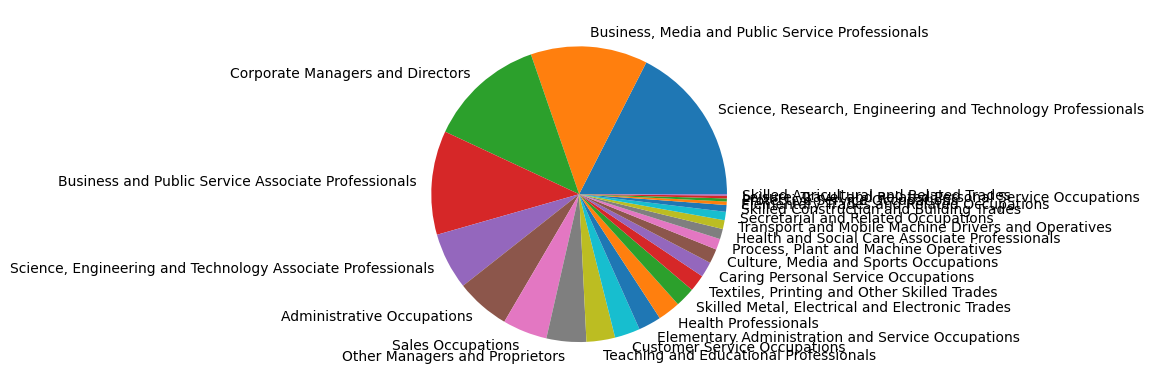

In [62]:
green_df['SOC_2_NAME'].value_counts().plot(kind='pie',ylabel='')

In [104]:
nice = ['Science, Research, Engineering and Technology Professionals',
        'Business, Media and Public Service Professionals',
        'Corporate Managers and Directors'
        'Business and Public Service Associate Professionals'
        'Science, Engineering and Technology Associate Professionals'
        'Administrative Occupations'
        'Sales Occupations']

green_df['SOC_2_NAME'].value_counts()[7:-1].sum()

1117

(-1.1020619873370554,
 1.1129740312691587,
 -1.1073430764724743,
 1.1003496741665852)

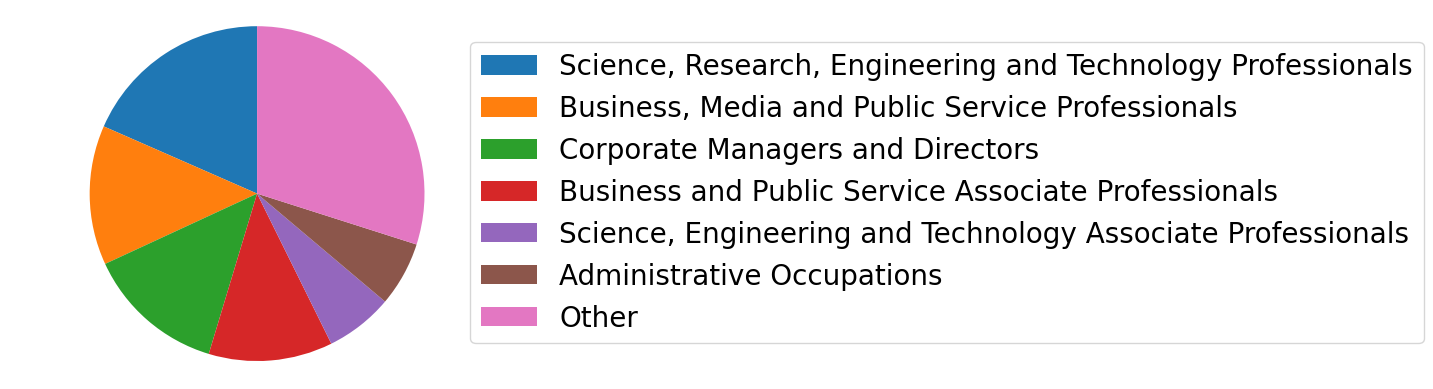

In [134]:
nicecounts = dict(green_df['SOC_2_NAME'].value_counts()[0:6])
nicecounts['Other'] = 1117
labels = []
sizes = []
for x, y in nicecounts.items():
    labels.append(x)
    sizes.append(y)

# colors = ['red', 'blue', 'green', 'yellow']

patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, bbox_to_anchor=(0.9, 0.95),prop={'size': 20})
plt.axis('equal')

<AxesSubplot:ylabel='SOC_2_NAME'>

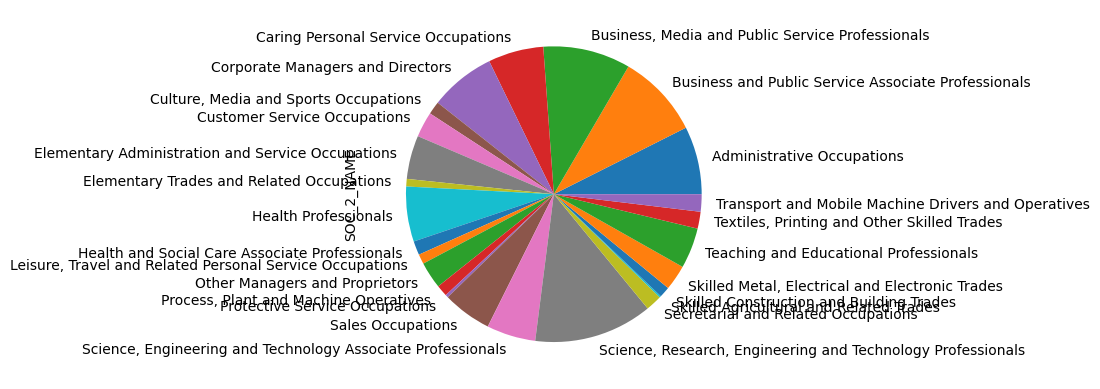

In [138]:
old = postings_data['SOC_2_NAME'].value_counts(normalize=True).sort_index()
old.plot.pie()

In [8]:
new = green_df['SOC_2_NAME'].value_counts(normalize=True).sort_index()
new

Administrative Occupations                                     0.059257
Business and Public Service Associate Professionals            0.113683
Business, Media and Public Service Professionals               0.127925
Caring Personal Service Occupations                            0.016785
Corporate Managers and Directors                               0.127670
Culture, Media and Sports Occupations                          0.015768
Customer Service Occupations                                   0.027721
Elementary Administration and Service Occupations              0.024924
Elementary Trades and Related Occupations                      0.003815
Health Professionals                                           0.024669
Health and Social Care Associate Professionals                 0.011190
Leisure, Travel and Related Personal Service Occupations       0.003052
Other Managers and Proprietors                                 0.043489
Process, Plant and Machine Operatives                          0

<AxesSubplot:ylabel='% Difference'>

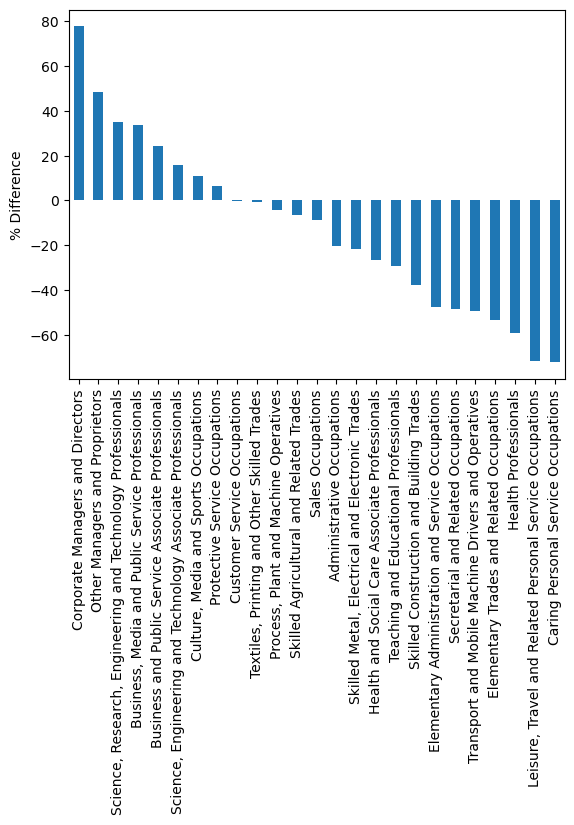

In [136]:
diffs = new - old
perc_diffs = diffs/old*100
perc_diffs.sort_values(ascending=False).plot(kind='bar',ylabel='% Difference')

In [137]:
perc_diffs.sort_values(ascending=False)

Corporate Managers and Directors                               77.739659
Other Managers and Proprietors                                 48.377067
Science, Research, Engineering and Technology Professionals    35.073775
Business, Media and Public Service Professionals               33.840469
Business and Public Service Associate Professionals            24.121197
Science, Engineering and Technology Associate Professionals    15.838966
Culture, Media and Sports Occupations                          10.808552
Protective Service Occupations                                  6.651790
Customer Service Occupations                                   -0.319089
Textiles, Printing and Other Skilled Trades                    -0.697983
Process, Plant and Machine Operatives                          -4.297802
Skilled Agricultural and Related Trades                        -6.383988
Sales Occupations                                              -8.933025
Administrative Occupations                         

In [151]:
green_corp['SOC_4_NAME'].value_counts()[7:-1].sum()

169

(-1.102483326988683,
 1.1150050381787202,
 -1.1049429717860169,
 1.100235397999287)

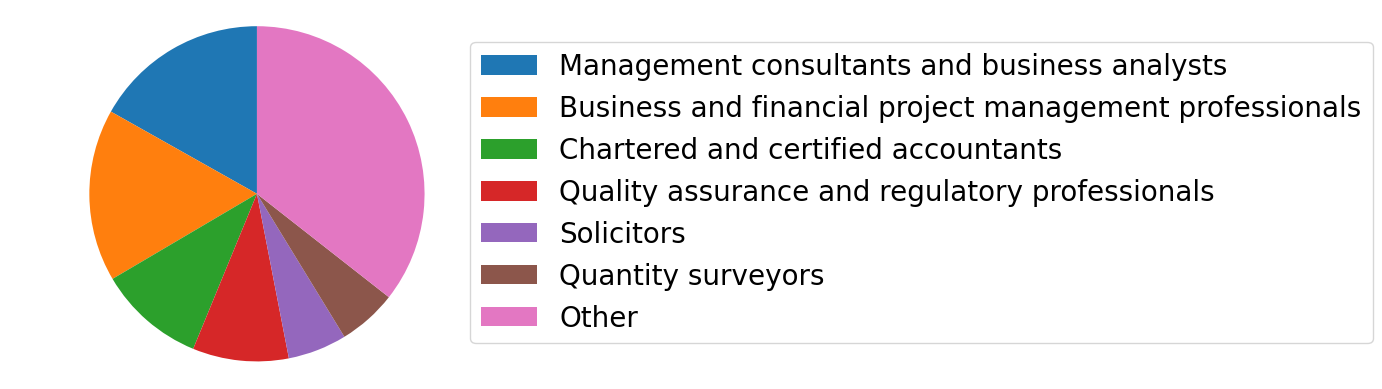

In [152]:
# Reduced df: corporate managers
green_corp = green_df[green_df['SOC_2_NAME'] == 'Business, Media and Public Service Professionals']
# green_corp['SOC_4_NAME'].value_counts().plot(kind='pie')

nicecounts = dict(green_corp['SOC_4_NAME'].value_counts()[0:6])
nicecounts['Other'] = 169
labels = []
sizes = []
for x, y in nicecounts.items():
    labels.append(x)
    sizes.append(y)

# colors = ['red', 'blue', 'green', 'yellow']

patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, bbox_to_anchor=(0.9, 0.95),prop={'size': 20})
plt.axis('equal')

In [47]:
# msd = green_df[green_df['SOC_4_NAME'] == 'Marketing and sales directors']
msd = green_df
spec_skills = msd['SPECIALIZED_SKILLS_NAME']
comm_skills = msd['COMMON_SKILLS_NAME']
sw_skills = msd['SOFTWARE_SKILLS_NAME']

spec_skill_split = [s[4:-2].replace('"', '').split(',\n  ') for s in spec_skills if len(s) > 3 ]
comm_skill_split = [s[4:-2].replace('"', '').split(',\n  ') for s in comm_skills if len(s) > 3 ]
sw_skill_split = [s[4:-2].replace('"', '').split(',\n  ') for s in sw_skills if len(s) > 3 ]

spec_skill_counts = Counter([sk for joblst in spec_skill_split for sk in joblst])
comm_skill_counts = Counter([sk for joblst in comm_skill_split for sk in joblst])
sw_skill_counts = Counter([sk for joblst in sw_skill_split for sk in joblst])

<BarContainer object of 4 artists>

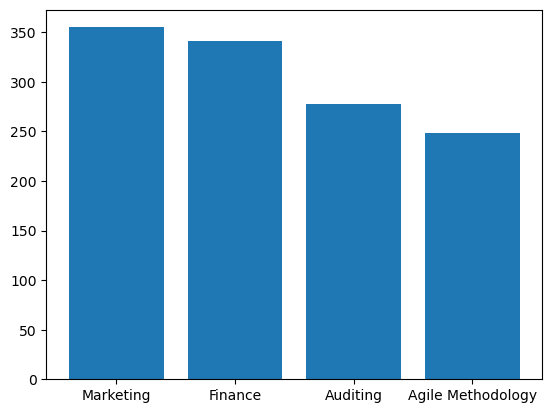

In [162]:
a = dict(spec_skill_counts.most_common()[0:4])

plt.bar(a.keys(), a.values())

In [57]:
[i for i in spec_skill_split if i == 'Branding']

[]

<BarContainer object of 4 artists>

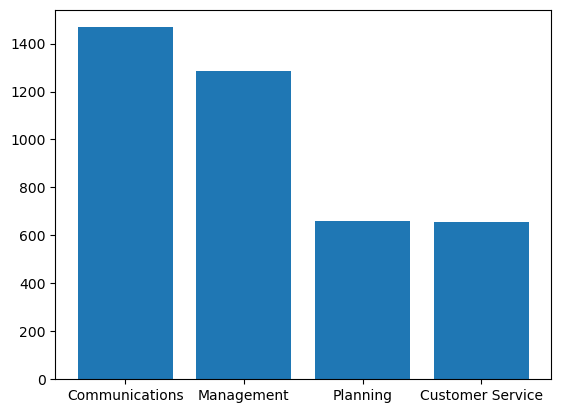

In [163]:
b = dict(comm_skill_counts.most_common()[0:4])
plt.bar(b.keys(), b.values())

In [51]:
c = sw_skill_counts.most_common()
c[0:9]

[('Microsoft Excel', 246),
 ('Microsoft Office', 187),
 ('Microsoft PowerPoint', 143),
 ('SAP Applications', 99),
 ('Microsoft Outlook', 90),
 ('Python (Programming Language)', 87),
 ('SQL (Programming Language)', 82),
 ('Amazon Web Services', 72),
 ('JavaScript (Programming Language)', 60)]

<AxesSubplot:ylabel='SOC_4_NAME'>

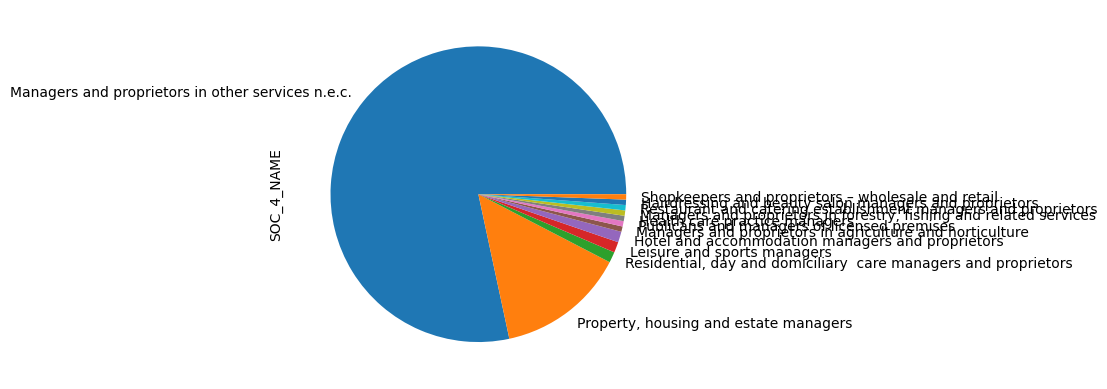

In [11]:
green_manag = green_df[green_df['SOC_2_NAME'] == 'Other Managers and Proprietors']
green_manag['SOC_4_NAME'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='SOC_4_NAME'>

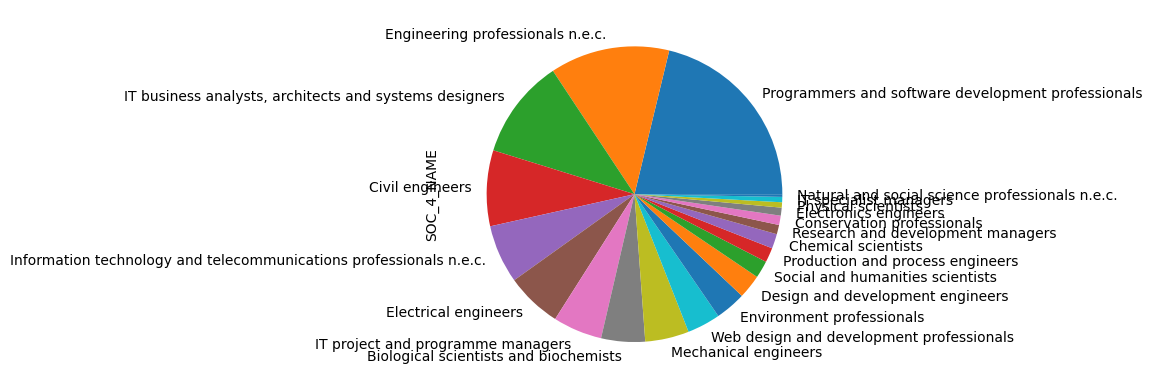

In [12]:
green_tech = green_df[green_df['SOC_2_NAME'] == 'Science, Research, Engineering and Technology Professionals']
green_tech['SOC_4_NAME'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='SOC_4_NAME'>

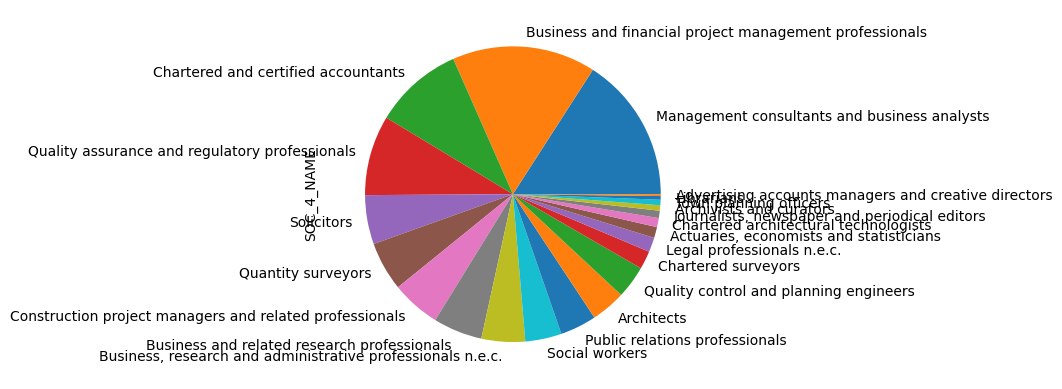

In [13]:
green_media = green_df[green_df['SOC_2_NAME'] == 'Business, Media and Public Service Professionals']
green_media['SOC_4_NAME'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='SOC_4_NAME'>

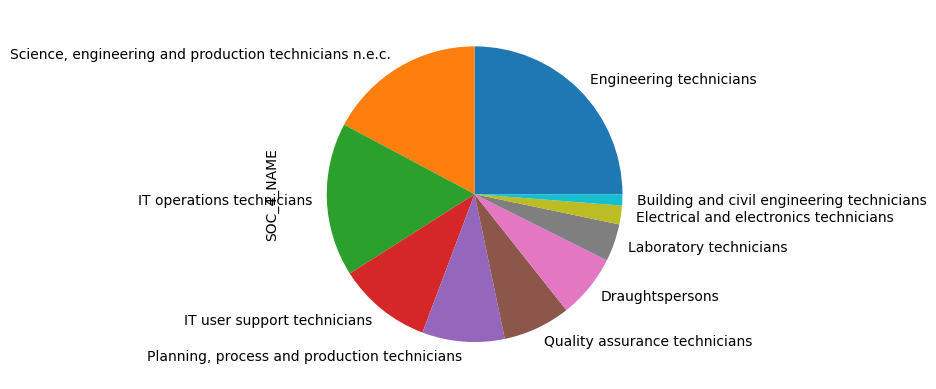

In [14]:
green_techa = green_df[green_df['SOC_2_NAME'] == 'Science, Engineering and Technology Associate Professionals']
green_techa['SOC_4_NAME'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='SOC_4_NAME'>

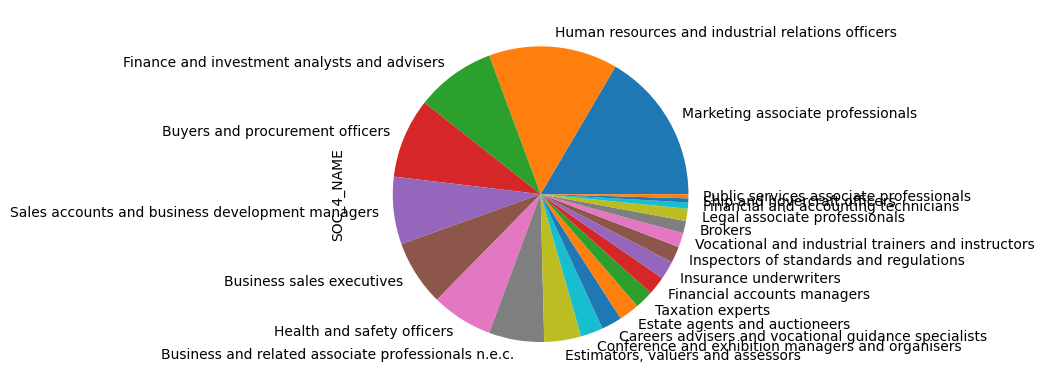

In [15]:
green_mediaa = green_df[green_df['SOC_2_NAME'] == 'Business and Public Service Associate Professionals']
green_mediaa['SOC_4_NAME'].value_counts().plot(kind='pie')